# Testes: Aula 1

Testando puxar arquivos e brincar em cima do que aprendeu até agora.

In [1]:
import pandas as pd
import numpy as np # Será necessario lá na frente!
import seaborn as sns # Será necessario lá na frente!
dados = pd.read_csv("base/dados.csv")

In [2]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Trabalhando com o sexo

In [3]:
dados["Sexo"]

0        0
1        1
2        1
3        0
4        1
        ..
76835    1
76836    0
76837    0
76838    0
76839    0
Name: Sexo, Length: 76840, dtype: int64

In [4]:
sorted(dados.Sexo.unique())

[0, 1]

# Aula2
## Método 1: DataFrame

In [5]:
# Value_counts() passa pelo csv e mostra quantos tem para cada um dos valores da coluna escolhida.
dados.Sexo.value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [6]:
dados['Sexo'].value_counts(normalize = True) 

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [7]:
dados['Sexo'].value_counts(normalize = True) * 100


0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [8]:
# Definindo em variáveis os valores que foram contados e suas porcentagens.
frequencia = dados["Sexo"].value_counts()
percentual = dados["Sexo"].value_counts(normalize = True) * 100

In [9]:
# Criando o data frame que juntará as informações com pd.DataFrame
dist_freq_qualitativa = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual})
dist_freq_qualitativa

,Frequência,Percentual
0,53250,69.299844
1,23590,30.700156


In [10]:
# Alteração de nome:
# Notas:
# Index define quais índices serão trocados, aqueles que ficam na coluna.
# Caso não coloque inplace = True, não será salvo a alteração do nome, e só aparecerá a alteração quando 
# executado a linha de código, com inplace alterará de fato.

#De forma mais prática podemos definir o dicionário antes para não colocar tudo na linha de uma vez só.
sexo = {0: "Masculino", 1: "Feminino"}

dist_freq_qualitativa.rename(index = sexo, inplace = True) 
dist_freq_qualitativa

,Frequência,Percentual
Masculino,53250,69.299844
Feminino,23590,30.700156


In [11]:
# Dando um nome para a área vazia da tabela, com rename_axis.
# Colocando de forma errada de forma proposital o eixo como de linha fica na seguinte forma.
dist_freq_qualitativa.rename_axis("Sexo", axis="rows")

,Frequência,Percentual
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


In [12]:
# Colocando agora como o eixo de colunas, e lembrando do inplace.
dist_freq_qualitativa.rename_axis("Sexo", axis="columns", inplace = True)
dist_freq_qualitativa

Sexo,Frequência,Percentual
Masculino,53250,69.299844
Feminino,23590,30.700156


Isso é a base da aula, agora vamos trabalhar em cima das outras colunas que antes não tinhamos trabalhado.

In [13]:
media = dados["Renda"].mean()
mediana = dados["Renda"].median()

In [14]:
print(media)
print(mediana)

2000.3831988547631
1200.0


In [15]:
#não sei mais o que fazer com renda agora vou para cor.
freq = dados["Cor"].value_counts()
perc = dados["Cor"].value_counts(normalize = True) * 100
cor = {8: "Parda", 6: "Amarela", 4: "Preta", 2: "Branca", 0:"Indígena", 9: "Sem declaração"}

dist_freq_qualitativa_cor = pd.DataFrame({"Frequência": freq, "Percentual (%)": perc})
dist_freq_qualitativa_cor.rename(cor , inplace = True)
dist_freq_qualitativa_cor.rename_axis("Cor", axis = "columns", inplace = True)

In [16]:
dist_freq_qualitativa_cor

Cor,Frequência,Percentual (%)
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indígena,357,0.464602
Amarela,352,0.458095



## Método 2: Crosstab
Um outro método que a gente pode usar é o de crosstab, que associa os valores/qualidade de duas colunas, como exemplo:

In [17]:
tabela1 = pd.crosstab(dados.Sexo,
                     dados.Cor)
tabela1

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


Com Zeros e uns fica mais difícil de entender, mas como antes, podemos renomear:

In [18]:
tabela1.rename(index = sexo, inplace = True)
tabela1.rename(columns = cor, inplace = True)
tabela1

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


Então podemos ver até como se fosse uma filtragem, em que separamos o sexo masculino do feminino e vemos quantos são de cada cor, por exemplo: Homens indígenas foram 256 entrevistados, já brancos foram 22194!

Podemos fazer a mesma coisa para qualquer outras relação entre colunas! Mas ainda continuando nessa ideia, Podemos reescrever da forma de percentual:

In [19]:
tabela2 = pd.crosstab(dados.Sexo,
                     dados.Cor,
                     normalize = True) * 100
tabela2.rename(index = sexo, inplace = True)
tabela2.rename(columns = cor, inplace = True)
tabela2

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


Tudo visto pelo percentual!

Esse método permite que façamos agregações de acordo com uma determinada função usando outra variável dentro do cruzamento. Por eemplo chamaremos a função agregadora _mean_ e calcularemos a média da **renda** que será o parâmetros values:

In [20]:
tabela3 = pd.crosstab(dados.Sexo,
                     dados.Cor,
                     aggfunc = "mean",
                     values = dados.Renda) 
tabela3.rename(index = sexo, inplace = True)
tabela3.rename(columns = cor, inplace = True)
tabela3

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


Então temos aqui a renda média das pessoas separando por sexo e por cor, uma pessoa do sexo masculino da cor preta tem a renda média de 1603 unidades monetárias da região. Já uma mulher parda ganha em média 1176 reais.

Outro exemplos que podemos usar isso, fazendo isso por estados e sexo:

In [21]:
estados = {11:"Rondônia", 12:"Acre", 13:"Amazonas", 14:"Roraima", 15:"Pará", 16:"Amapá", 17: "Tocatins", 21: "Maranhão", 22:"Piauí", 23:"Ceará", 24:"Rio Grande do Norte", 25:"Paraíba", 26:"Pernambuco", 27:"Alagoas", 28:"Sergipe", 29: "Bahia", 31:"Minas Gerais", 32:"Espírito Santo", 33:"Rio de Janeiro", 35:"São Paulo", 41:"Paraná", 42:"Santa Catarina", 43:"Rio Grande do Sul", 50:"Mato Grosso do Sul", 51:"Mato Grosso", 52:"Goiás", 53:"Distrito Federal"}
tabela4 = pd.crosstab(dados.UF,
                     dados.Sexo)

tabela4.rename(index = estados, inplace = True)
tabela4.rename(columns = sexo, inplace = True)
tabela4


Sexo,Masculino,Feminino
UF,,
Rondônia,1138,399
Acre,698,239
Amazonas,1518,688
Roraima,354,186
Pará,3146,1303
Amapá,330,182
Tocatins,958,348
Maranhão,1197,590
Piauí,857,354


Então aqui vemos uma separação da quantidade de homens e mulheres que foram entrevistados por estado.

Podemos trabalhar em cima dessa tabela padrão e achar alguns valores quantitativos sobre cada estado, ou a altura máxima ou mínima, ou altura média por estado ou fazer a mesma coisa por renda.

### Exemplo 1: Altura máxima de cada estado separando homem e mulher.

In [22]:
tabela5 = pd.crosstab(dados.UF,
                     dados.Sexo,
                     aggfunc = "max",
                     values = dados.Altura)

tabela5.rename(index = estados, inplace = True)
tabela5.rename(columns = sexo, inplace = True)
tabela5

Sexo,Masculino,Feminino
UF,,
Rondônia,1.938220,1.929639
Acre,1.917092,1.936058
Amazonas,1.978624,1.975803
Roraima,1.946004,1.891388
Pará,1.962313,1.927602
Amapá,1.919866,1.918828
Tocatins,1.977517,1.959500
Maranhão,1.990397,1.970943
Piauí,1.953232,1.937772


### Exemplo 2: Altura média de cada estado separando homem e mulher.

In [23]:
tabela6 = pd.crosstab(dados.UF,
                     dados.Sexo,
                     aggfunc = "mean",
                     values = dados.Altura)

tabela6.rename(index = estados, inplace = True)
tabela6.rename(columns = sexo, inplace = True)
tabela6

Sexo,Masculino,Feminino
UF,,
Rondônia,1.705325,1.700093
Acre,1.698938,1.699622
Amazonas,1.698107,1.702427
Roraima,1.700592,1.695041
Pará,1.697556,1.699746
Amapá,1.700231,1.693648
Tocatins,1.698679,1.703521
Maranhão,1.699123,1.700896
Piauí,1.700241,1.700062


É engraçado que a média brasileira é 1.70 tanto para homens quanto para mulheres, variando entre 1,69m en alguns lugares e 1,70m em outros.

In [24]:
#Exemplo2: Renda média de cada estado separando homem e mulher.
tabela7 = pd.crosstab(dados.UF,
                     dados.Sexo,
                     aggfunc = "mean",
                     values = dados.Renda)

tabela7.rename(index = estados, inplace = True)
tabela7.rename(columns = sexo, inplace = True)
tabela7

Sexo,Masculino,Feminino
UF,,
Rondônia,1921.209139,1414.854637
Acre,1635.342407,1128.615063
Amazonas,1539.989460,1235.832849
Roraima,1875.788136,1608.112903
Pará,1509.741894,1131.884114
Amapá,1930.396970,1736.164835
Tocatins,1912.509395,1381.798851
Maranhão,1165.172097,723.752542
Piauí,1146.710618,899.858757


Onde é possível ver os estados que ganham mais dinheiro em média, não necessariamente todos ganham muito teria que analisar a mediana e outros pontos. Podemos ver que em média, nas regiões do Sudeste, Sul e Centro-Oeste ganham mais.

## Distribuição de frequências quantitativas - classes personalizadas!

Vamos dizer que agora eu quero separar em várias categorias as rendas, ou seja, vou separar de acordo como eu quiser. Só que o comando que eu quero utilizar, precisa saber tanto do mínimo quanto do máximo de renda, do valor que quero categorizar:

### Exemplo 1: Separando por renda.

In [25]:
dados.Renda.min()

0

In [26]:
dados.Renda.max()

200000

Agora vamos precisar fazer duas listas para separar às classes/categorias:

In [27]:
#Lista que separará o valores das rendas, começando da mínima e indo até a máxima:
classes = [0,1576,3152,7880,15760,200000]

#Lista que nomeará cada uma das categorias das rendas de acordo com a ordem de min até max:
labels = ["E","D","C","B","A"]

Então agora usando o comando para fazer a separação de categorias:

In [28]:
# O primeiro parâmetro do cut é a variável que será categorizada, o que a gente quer colocar 
# é a Rena, então lá está.
# O segundo parâmetro é os limites de cada classe, a lista de classes, que pega os valores da categorização
# O terceiro é o nome de cada uma, sendo uma lista.
# E o último comando é para incluir o valor mínimo que ficaria de fora caso fosse falso.


pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

Agora para pegar esse valor e saber quanto tem em cada, podemos fazer o seguinte código.

In [29]:
# Colocando o código dentro dos parênteses de value_counts, conseguimos ver quantos tem de cada.

pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True))

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [30]:
#Valor chamar ele de frequência e depois criar o percentual e depois colocar numa tabela utiilzando dataframe:
freq2 = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True))

perc2 = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True), normalize = True) * 100
dist_freq_quantitativa_renda = pd.DataFrame({"Frequência": freq2, "Porcentagem (%)": perc2})

# Para ordenação inversa basta:
dist_freq_quantitativa_renda.sort_index(ascending = False, inplace = True)
dist_freq_quantitativa_renda

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


Por padrão, ele coloca do maior para o menor! Com o sort_index e ascending falso ele muda!

Vamos fazer outra categorização personalizada fazendo por região do Brasil!

### Exemplo 2: Quantidade de Pessoas por Região que foi entrevistada.

In [31]:
dados.UF.min()

11

In [32]:
dados.UF.max()

53

In [33]:
classes2 = [10,20,30,40,49,60] # Tem que ser 49 pois se for 50 ele entende que é do anterior, e o 50 é do próximo
labels2 = ["Norte","Nordeste","Sudeste","Sul","Centro-Oeste"]

In [34]:
# Isso aqui é algo extra, ele vai pegar o array criado do unique e vai associar com a categoria, fazendo o novo array abaixo
pd.cut(x = dados.UF.unique(),
      bins = classes2,
      labels = labels2)

['Norte', 'Norte', 'Norte', 'Norte', 'Norte', ..., 'Sul', 'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste']
Length: 27
Categories (5, object): ['Norte' < 'Nordeste' < 'Sudeste' < 'Sul' < 'Centro-Oeste']

In [35]:
# Fazendo o value_counts desse array nos entrega a quantidade de estados por região! FODA
pd.value_counts(
    pd.cut(x = dados.UF.unique(),
    bins = classes2,
    labels = labels2))

Nordeste        9
Norte           7
Sudeste         4
Centro-Oeste    4
Sul             3
dtype: int64

In [36]:
#Voltando a trajetória inicial:
freq3 = pd.value_counts(
    pd.cut(x = dados.UF,
          bins = classes2,
          labels = labels2))
perc3 = pd.value_counts(
    pd.cut(x = dados.UF,
          bins = classes2,
          labels = labels2),
    normalize = True) * 100 

dist_freq_quantitativa_estados = pd.DataFrame({"Frequência": freq3, "Porcentagem (%)": perc3})
dist_freq_quantitativa_estados

,Frequência,Porcentagem (%)
Sudeste,23297,30.318844
Nordeste,20331,26.458876
Sul,12953,16.857106
Norte,11487,14.949245
Centro-Oeste,8772,11.415929


Isso mostra que 30.3% dos entrevistados eram da região Sudeste, 26.4% eram do Nordeste e assim vai diminuindo até o Centro-Oeste com 11.4%!

### Exemplo 3 : Estatura das pessoas (exemplo da Alura)

In [37]:
classes3 = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels3 = ['1 - Baixa', '2 - Média', '3 - Alta']

freq4 = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes3,
        labels = labels3,
        include_lowest = True
    )
)

perc4 = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes3,
        labels = labels3,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': freq4, 'Porcentagem (%)': perc4}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


De forma resumida, ele começa definindo as duas listas de classe e de labels, onde é definido pela altura mínima e máxima como extremos, e dá os nomes de Baixo média e alta.

Faz a categorização com o cut e depois faz a contagem sobre os dados com o value_counts(), gerando a frequência, de forma semelhante ele faz o percentual acrescentando o normalize = True, por fim faz o data frame das estaturas, ordenando pela ordem do menos para o maior do index, com o ascending = True, que colocando o 1, 2 e 3 na frente torna possível ordenar da forma que deseja.

## Distribuição de frequência com classe de amplitude fixa.

Agora utilizaremos a regra de Sturges que se dá na forma de k = 1 + (10/3 log₁₀ n), que precisamos da biblioteca de numpy para fazer esse cálculo, mais especificamente para o logarítmo, e além disso, esse n é associado com a quantidade de registros que tem nos dados, e podemos encontrar isso com o .shape:

In [38]:
dados.shape

(76840, 7)

>O primeiro valor é a quantidade de registros, número de linhas, e o segundo valor é a quantidade de variáveis, ou quantidade de colunas.

In [39]:
n = dados.shape[0]

In [40]:
k = 1 + (10/3)*np.log10(n)
k

17.285291187298853

Esse valor que saiu da regra de Sturges mostra em quantas categorias que poderia ser dividida de forma fixa.

In [41]:
# Fazendo um arredondamento do valor. Round funciona pegando um valor de ponto flutuante e 
# aplicando nele, o número dentro do parênteses é a quantidade de casas decimais necessárias. 
# Deixar vazio ou com 0 é a mesma coisa. Aplicamos o int para que seja inteiro (isso já faria o trabalho do round.)
k = int(k.round())
k

17

In [42]:
# Agora faremos o trabalho que fizemos anterior, só que baseado nessa categorização:
# Ao invés de colocar a lista em bins, podemos simplesmente colocar o número de divisões que queremos!
# Além disso, não foi colocado o labels pois boa sorte nomeando 17 níveis de renda auehaeuhauehae
# Vimos anteriormente que o dataframe pode ser ordenado através do ascending, o 
# value_counts pode ser desordenado através do método sort

freq5 = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest=True),
    sort = False)
freq5

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [43]:
# Fazendo o mesmo para o percentual e fazendo a distribuição:
perc5 = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest=True),
    sort = False,
    normalize = True)
perc5

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

In [44]:
dist_freq_quantitativa_renda2 = pd.DataFrame({"Frequência": freq5, "Porcentagem (%)": perc5})
dist_freq_quantitativa_renda2.sort_index(ascending=True)

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


Essa regra de sturges é boa quando temos um valor quantitativo com várias possibilidades, quando é contínuo, o caso da renda ou da altura é um bom exemplo, já os outros tem valores qualitativos que não servem para isso.

## Histogramas!

Para cá nós utilizaremos a biblioteca do seaborn, que é muito abrangente e só usaremos para o fim de histogramas! Fazendo um resumo do que será feito:
- Definindo uma variável que vai guardar o histograma;
- Definir a largura e altura de cada um dos blocos do histograma;
- Definir o título e o tamanho de sua fonte;
- Definir o nome do eixo horizontal, eixo x;
- E por fim plotamos o histograma!

<AxesSubplot:title={'center':'Distribuição de Frequências - Altura'}, xlabel='Metros', ylabel='Quantidade de pessoas'>

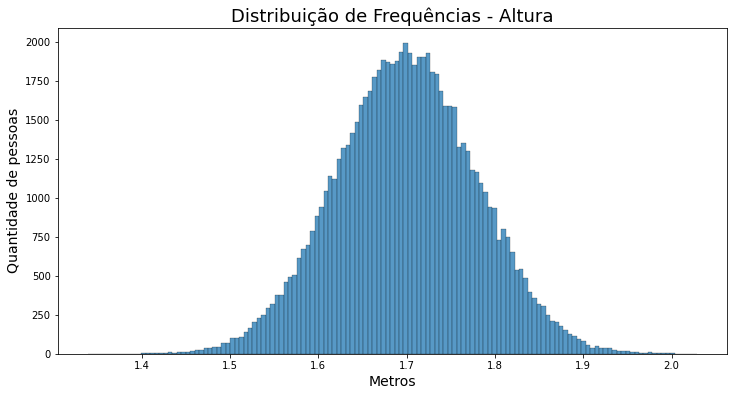

In [45]:
# Esse kde = False, é para não aparecer a linha que acompanha os blocos 
# fazendo como se fosse uma média do comportamento tornando ele contínuo.

# IMPORTANTE: Na versão da aula, o professor cria o histograma utilizando o método distplot, contudo quando
# Fazendo por aqui, indica que distplot sai´ra das futuras versões então é melhor ou mudar 
# para displot ou histplot, dispot não tem título e não sei para que serve, já histplot é para 
# histograma de fato, e tudo pode ser utilizado. Por isso já está como histplot.

ax = sns.histplot(dados.Altura, kde = False) # Definindo como histograma

ax.figure.set_size_inches(12,6) #Largura e altura, tem um padrão, mas é melhor utilizar esse tamanho para o hist

ax.set_title("Distribuição de Frequências - Altura", fontsize = 18) # Título

ax.set_xlabel("Metros", fontsize = 14) # Nome do eixo horizontal

ax.set_ylabel("Quantidade de pessoas", fontsize= 14) # EXTRA: nome do eixo vertical

ax

<AxesSubplot:title={'center':'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Quantidade de pessoas'>

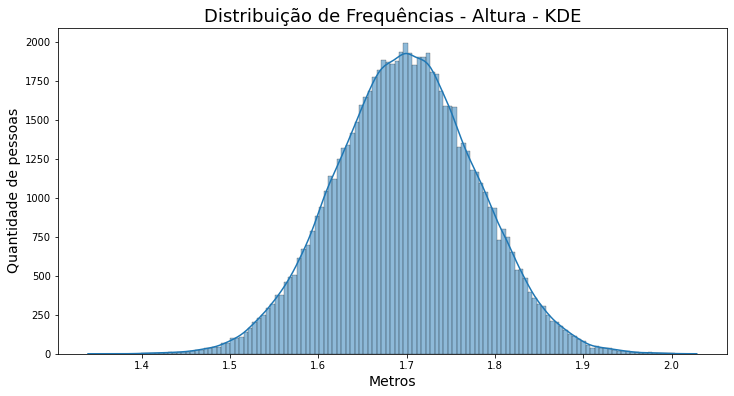

In [46]:
# Fazendo agora com o kde para ter uma ideia de como fica:

ax2 = sns.histplot(dados.Altura, kde = True) # Definindo como histograma

ax2.figure.set_size_inches(12,6) #Largura e altura
ax2.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18) # Título
ax2.set_xlabel("Metros", fontsize = 14) # Nome do eixo horizontal
ax2.set_ylabel("Quantidade de pessoas", fontsize= 14) # EXTRA: nome do eixo vertical

ax2

Mas agora nós temos uma uma situação em que foi subdividido em várias categorias, temos uma forma de definir fixamente um número de bins, que não precisa da biblioteca do seaborn, basta do pandas, mas é aparentemente uma forma mais simples.

<AxesSubplot:>

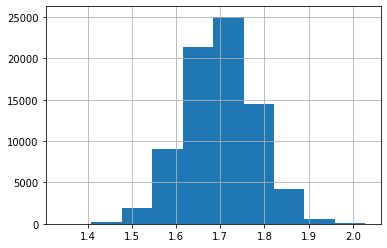

In [47]:
dados.Altura.hist()

Podemos também definir números mais certos:

<AxesSubplot:>

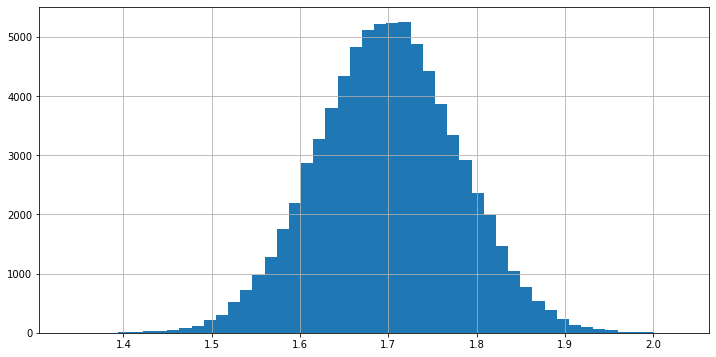

In [48]:
#Seriam classes dentro do parênteses.
dados.Altura.hist(bins = 50, figsize = (12, 6))

Assim podemos ter uma noção melhor de como fica o histograma, melhor que o anterior pelo menos.

Mas agora voltando para uma distribuição anteriormente feita, vamos colocar ela na forma de histograma:

In [49]:
#Para lembrar qual é:
dist_freq_quantitativa_renda

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


<AxesSubplot:>

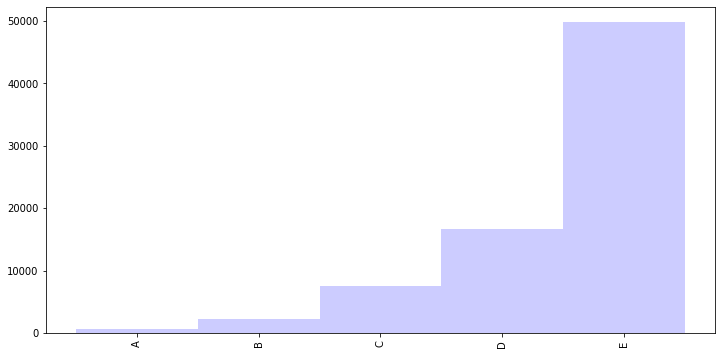

In [50]:
# Gráfico de barras dessa distribuição de frequências:
dist_freq_quantitativa_renda["Frequência"].plot.bar(width = 1, color = "blue", alpha = 0.2, figsize = (12,6))

Está nessa ordem pois eu coloquei o ascending como False, e para explicar cada parâmetro da célula 54:
* _["Frequência"]_ é só para informar especificamente o que a gente quer desa distribuição;
* plot define gráfico e _bar_ o seu tipo;
* _width_ é a largura de cada uma das bases;
* _color_ define a cor das barras;
* _alpha_ define a transparência das barras;
* _figsize_ assim como anteriormente define o tamanho da figura;

# Aula3
## Média (Aritmética)

Soma de todos os valores de interesses com pesos iguais, e a divisão pelo total de vlaores somados.

Começando com um novo dataframe mostrando com e fácil fazer uma média:

In [51]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


Aqui temos então um conjunto de matérias de 3 pessoas, para fazer a média das notas, basta fazer:

In [52]:
df["Fulano"].mean()

7.714285714285714

Essa é a média de Fulano!

Voltando a utilização dos dados principais:

In [53]:
dados.groupby(["Sexo"]).mean()

,UF,Idade,Cor,Anos de Estudo,Renda,Altura
Sexo,,,,,,
0,31.901991,44.046554,5.038685,9.120169,2192.441596,1.699443
1,31.937728,44.127554,5.018906,10.258584,1566.847393,1.699670


Utilizando da forma groupby, ele vai grupar o que a gente quer pela coluna escolhida, colocando ela na linha e o resto na coluna, e pela função de terminada, contudo somente da forma de código colocada anteriormente, ele fará a média de tudo, mesmo aquelas informação que sejam qualitativas, como UF, Anos de estudo, trazendo uma informação que não faz sentido assim.

O certo seria utilizar já definindo qual é a outra coluna que queremos trabalhar com:

In [54]:
dados.groupby(["Sexo"]).Renda.mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

Assim mostramos a renda por sexo, de forma geral. E se fizermos ao contrário, a grupar por renda e escolher sexo para fazer a média? Vai só alterar linha por coluna? 

De fato vai, mas irá pegar todas as unidades possíveis de renda:

In [55]:
dados.groupby(["Renda"]).Sexo.mean()

Renda
0         0.361702
5         0.000000
6         0.000000
8         0.500000
10        0.555556
            ...   
80000     0.000000
90000     0.000000
100000    0.333333
120000    1.000000
200000    0.000000
Name: Sexo, Length: 1606, dtype: float64

Ele pega todo caso de Renda e faz a média dos valores, se zero, implica que tem o mesmo número de mulheres e homens, mas tem vários outros casos que se torna difícil de visualizar ou até mesmo tirar informação dessa forma.

Média de quais estados cada sexo vive, até a interpretação disso é difícil de entender:

In [56]:
dados.groupby(["Sexo"]).UF.mean()

Sexo
0    31.901991
1    31.937728
Name: UF, dtype: float64

Lembrando que nem sempre a média e a melhor forma de de fato ver a média dos valores sendo analisados. Nesse caso fazendo a média da renda por sexo, é claro que a média em si não é tão bem acurada assim.

In [57]:
# Exemplo em sala de aula:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
dataset

,Sexo,Idade
0,H,53
1,M,72
2,M,54
3,M,27
4,M,30
5,H,40
6,H,58
7,H,32
8,M,44
9,M,51


In [58]:
#Média da idade
dataset.Idade.mean()

46.1

In [59]:
# Média da idade por gênero, onde mostra todos os gêneros:
dataset.groupby(["Sexo"]).mean()

,Idade
Sexo,
H,45.750000
M,46.333333


In [60]:
# Caso eu queria de um gênero específico seja tanto para series quanto para DataFrame, 
# eu tenho que colocar loc["Nome do que eu quero"] depois:
dataset.groupby(["Sexo"]).mean().loc["H"]

Idade    45.75
Name: H, dtype: float64

## Mediana
Caso ordenemos todos os registros de acordo com a coluna de nosso interesse da mediana, aquele que se encontrar no meio da ordenação, 50% para esquerda e para direita da ordenação é a mediana, caso tenha par registros, basta pegar o primeiro da direita que se encontra na média.

In [61]:
# Achando a nota mediana do Fulano, ordenando por valor para ficar mais fácil de visualizar:
notas_fulano = df.Fulano.sort_values()
notas_fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

 Para deixar de ser uma _series_ e tornar ela um DataFrame, podemos utilizar o método reset_index:

In [62]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [63]:
notas_fulano.Fulano.median()
# OU
# df.Fulano.median()

# Ambos terão o mesmo resultado.

8.0

Outra forma de pegar a mediana é com _quantille_:
Mas para que serve? Por padrão ele dá a mediana, mas pode ser alterado com os parâmetros, para ver melhor a descrição do método basta tirar o comentário da linha de código abaixo e rodar a célula.

In [64]:
# df.Fulano.quantile? # Para ver a descrição exata dada pelo notebook
df.Fulano.quantile()

8.0

## Moda
É o valor mais frequente num conjunto de dados.

In [65]:
# Para relembrar
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [66]:
# Para pegar a moda, basta escrever o comando:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


Estamos vendo o caso em que todos só apresentam uma moda, mas caso fosse bimodal ou até multimodal o resultado seria outro.

In [67]:
# Exemplo bimodal
exemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 6])
exemplo

0    1
1    2
2    2
3    3
4    4
5    4
6    5
7    6
8    6
dtype: int64

In [68]:
# Pegando a moda:
exemplo.mode()

0    2
1    4
2    6
dtype: int64

Retornando assim um exemplo de caso multimodal.

Moda é boa para ser usada em casos de variáveis qualitativas!

Mas mesmo assim podemos usar na Renda, para ver quanto maior parte das pessoas recebem:

In [69]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

Então a moda é 788 reais, apesar de que a média é 2000 reais, então é possível ver que tem alguns casos que se destacam muito acima de 788 para tornar a média tão alta assim.

## Relação entre média, mediana e moda.

Matéria da aula 3, ele já havia escrevido antes, então eu nem tentei copiar, dá para ver depois no caderno dele. É importante entender a relação entre às 3 para ver como é a simetria do problema, se é assimétrico para direita ou para esquerda, ou simétrico, apesar de ser mais difícil.
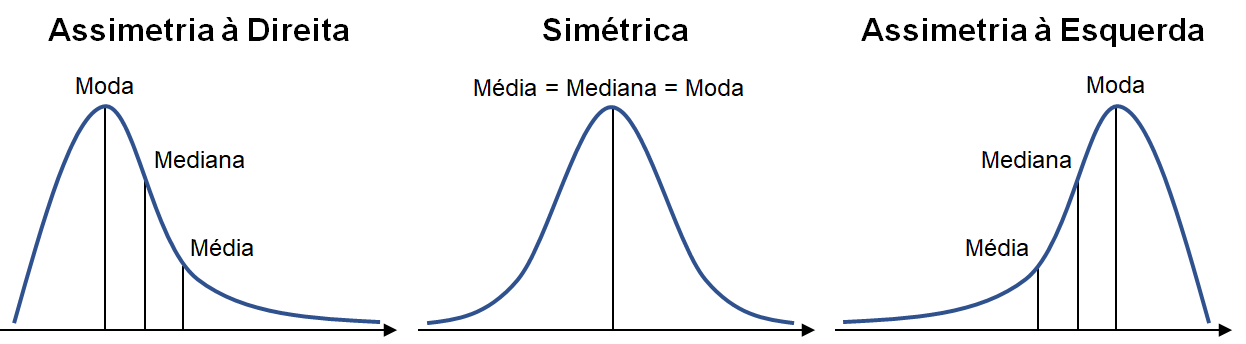


# Aula4: Medidas Separatrizes

Medidas separatrizes são aquelas que funcionam como a mediana, que separa 50% e 50%, que separam em porcentagens dos dados ordenados.

Os quartis separam em 4 partes, decis em 10 partes, percentis em 100 partes.
Para fazer essa separação basta usar o quantile que usamos anteriormente, só que especificando a forma que queremos. Lembrando que para fazer a separação em duas partes, precisa colocar aonde da ordenação queremos separar, só colocando uma separação.

Para n separações, precisamos de n-1 valores para definir onde queremos separar.

In [70]:
dados.Renda.quantile()

1200.0

In [71]:
# Que é a mesma coisa que usar:
dados.Renda.quantile(q = 0.5)

1200.0

In [72]:
# Fazendo a linha de comando para os quartis
dados.Renda.quantile([0.25,0.5,0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [73]:
# fazendo list comprehension para fazer  as separações para o quantile da forma de lista.
[i for i in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [74]:
# Fazendo a linha de comando para os decis:
# Precisamos colocar i/10 pois os valores tem que ser de 0 a 1, como se fosse a porcentagem dos dados.
dados.Renda.quantile([i/10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

Disso podemos tirar, por exemplo, que 40% das pessoas entrevistadas ganham até 1000 reais. E somente 10% ganham acima de 4000 reais.

Para o percentis, abaixo, temos mais casos uma vez que, temos melhores porcentagens sobre os valores das rendas.

In [75]:
# Fazendo para o percentis:
dados.Renda.quantile([i/100 for i in range(1,100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

A partir de agora faremos um histograma acumulativo de idade, para praticar a ideia de acumulativo e facilitar a visualização das medidas separatrizes:

<AxesSubplot:title={'center':'Distribuição de Frequência acumuladas de Idade'}, xlabel='Anos', ylabel='Acumulado'>

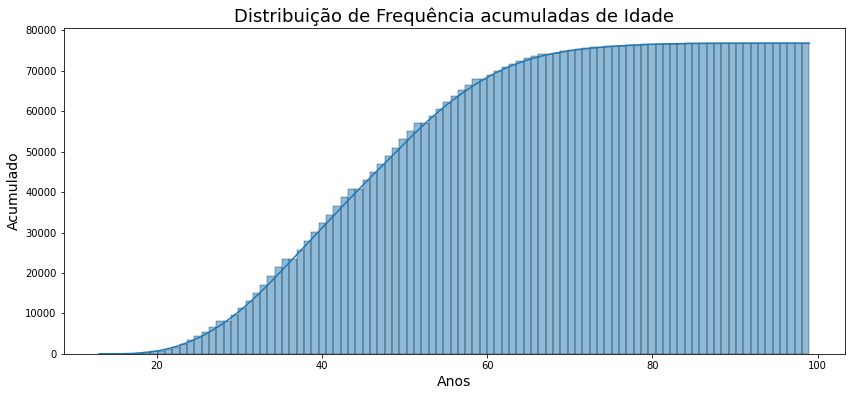

In [76]:
ax3 = sns.histplot(dados.Idade,
                  cumulative = True,
                  kde = True)
ax3.figure.set_size_inches(14,6)
ax3.set_title("Distribuição de Frequência acumuladas de Idade", fontsize = 18)
ax3.set_xlabel("Anos", fontsize = 14)
ax3.set_ylabel("Acumulado", fontsize = 14)
ax3

In [77]:
# Vamos fazer o décis para a idade e checar com o histograma acumulativo para visualizar.
dados.Idade.quantile([i/10 for i in range(1,10)])

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

<AxesSubplot:title={'center':'Distribuição de Frequência acumuladas de Idade'}, xlabel='Anos', ylabel='Acumulado'>

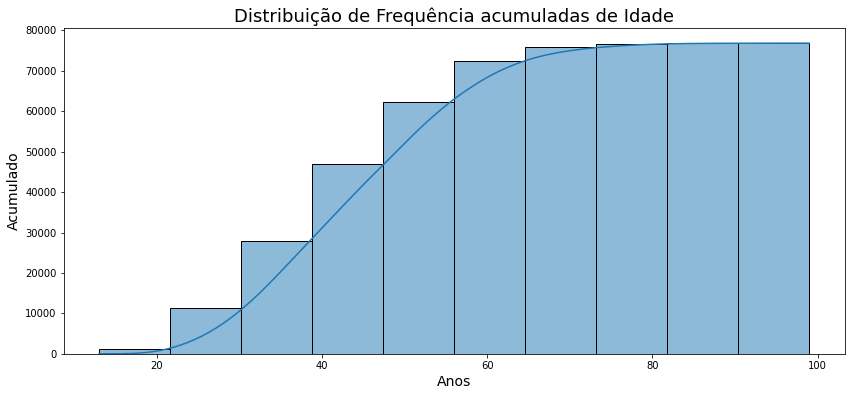

In [78]:
# Fazendo a mesma coisa só que agora nós alterando a quantidade de separações para 10 bins

ax3 = sns.histplot(dados.Idade,
                  cumulative = True,
                  kde = True,
                  bins = 10)
ax3.figure.set_size_inches(14,6)
ax3.set_title("Distribuição de Frequência acumuladas de Idade", fontsize = 18)
ax3.set_xlabel("Anos", fontsize = 14)
ax3.set_ylabel("Acumulado", fontsize = 14)
ax3

Podemos fazer a comparação entre os dois, da series e do histograma acumulativo, e vemos que 90% das pessoas estão abaixo de 61 anos, por exemplo. Outra coisa é também é 10% tem menos de 28 anos.

## Boxplot

Boxplot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispesão por _**IIQ**_. As posições relativas de _**Q1**_, _**Mediana**_ e _**Q3**_ dão uma noçao da simetria da distribuição. Os comprimentos das caudas são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.
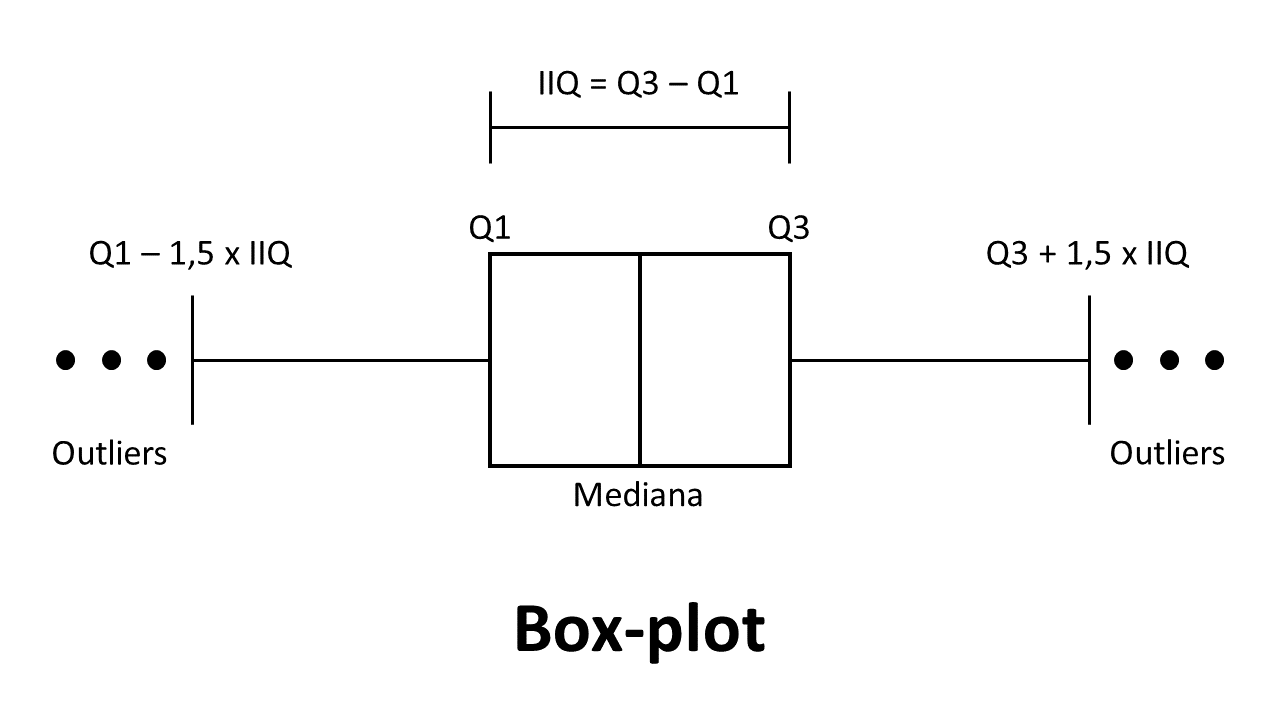

O cara faz cada Q, Q1 e Q3, como quartis, que um é 25% e o outro é 75%, e a mediana seria o 50%. A diferença entre os dois quartis é o IIQ, intervalo inter quatil, que é uma informação de _dispersão de dados_. Indo para os outliers precisamos fazer a diferença dos quartis extremos subtraído do IIQ. Não necessariamente depois dos limites extremos são outliers, eles seriam candidatos para outliers, temos que visualizar e interpretar para depois definir.

Como fazer um boxplot:
## Exemplo 1: Altura!

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros'>

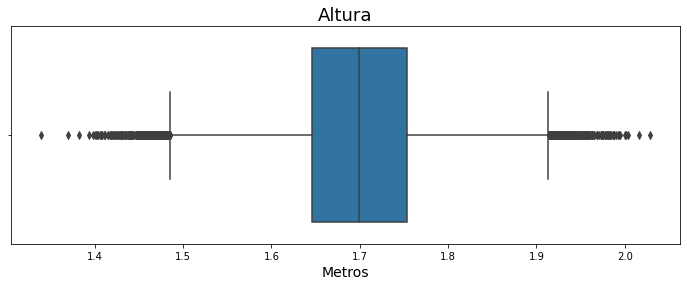

In [79]:
ax41 = sns.boxplot( x = dados.Altura,              # x = "Altura", data = dados - daria a mesma coisa
                   orient = "h")                   # Definir a orientação do box plot para horizontal
ax41.figure.set_size_inches(12,4)
ax41.set_title("Altura", fontsize = 18)
ax41.set_xlabel("Metros", fontsize = 14)
ax41

# Nota: Se eu fizesse a variável com y, ao invpes de x, e colocasse o orient ='v', 
# ficaria na vertical o boxplot.


## Exemplo 2: Altura separando Sexos

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros', ylabel='Sexo'>

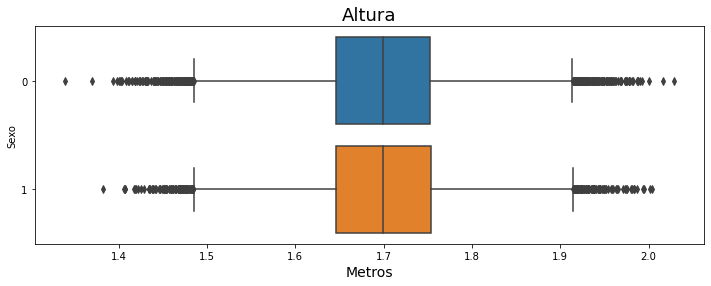

In [80]:
# Podemos acrescentar uma segunda variável no eixo y.

ax42 = sns.boxplot( x = dados.Altura, y = dados.Sexo,             
                   orient = "h")                   
ax42.figure.set_size_inches(12,4)
ax42.set_title("Altura", fontsize = 18)
ax42.set_xlabel("Metros", fontsize = 14)
ax42

# Agora temos uma separação de altura por sexo. E vmos que para os dois casos ainda é bem simétrico!

## Exemplo 3: Renda!

<AxesSubplot:title={'center':'Renda'}, xlabel='R$'>

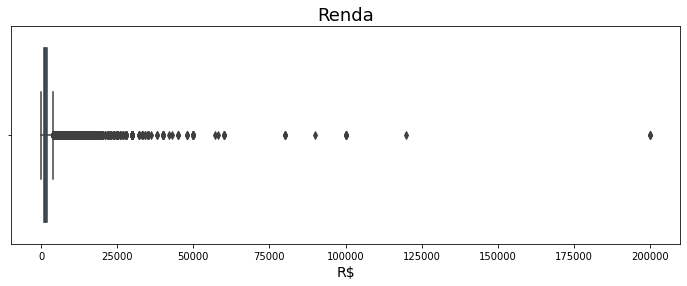

In [81]:
ax43 = sns.boxplot( x = dados.Renda,             
                   orient = "h")                   
ax43.figure.set_size_inches(12,4)
ax43.set_title("Renda", fontsize = 18)
ax43.set_xlabel("R$", fontsize = 14)
ax43

Dessa forma não podemos ver tanto do box plot, pela assimetria que é puxada por causa dos casos de 20000, a forma de lidar com isso é fazer uma query que reduz a quantidade de casos extremos, fazemos uma filtragem basicamente:

<AxesSubplot:title={'center':'Renda'}, xlabel='R$'>

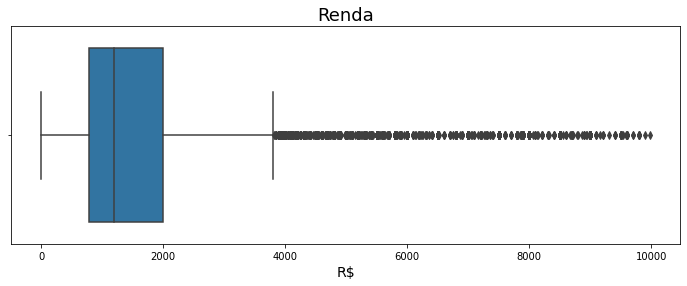

In [82]:
# faremos da forma do professor pela falta de conhecimento de fazer outra forma.
ax43 = sns.boxplot( x = "Renda", data = dados.query("Renda < 10000"),             
                   orient = "h")                   
ax43.figure.set_size_inches(12,4)
ax43.set_title("Renda", fontsize = 18)
ax43.set_xlabel("R$", fontsize = 14)
ax43

Agora a distribuição está mais visível, conseguimos ver os quartis de uma forma mais adequada. Filtramos os casos maiores que 10 mil, contudo muito mais fácil de entender a renda.

## Exemplo 4: Renda para ambos os Sexos:

<AxesSubplot:title={'center':'Renda'}, xlabel='R$', ylabel='Sexo'>

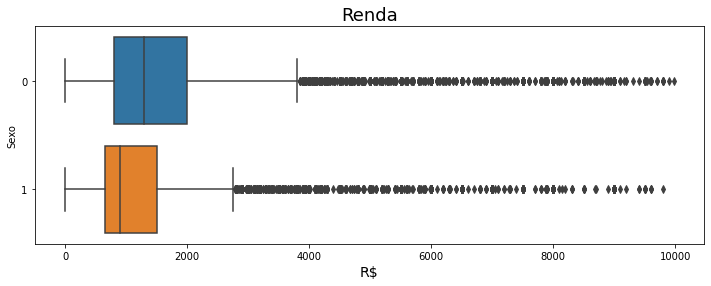

In [83]:
ax44 = sns.boxplot( x = "Renda", y = "Sexo", data = dados.query("Renda < 10000"),             
                   orient = "h")                   
ax44.figure.set_size_inches(12,4)
ax44.set_title("Renda", fontsize = 18)
ax44.set_xlabel("R$", fontsize = 14)
ax44

Fica claro pela comparação entre as duas linhas, e tendo noção que 0 é masculino e 1 é feminino, que os homens entrevistados tem uma renda média maior do que as mulheres entrevistadas. Quase 25% dos homens recebem mais 50% das mulheres. Com o boxplot podemos tirar conclusões que seriam mais difícil de ver só no olho.

Agora vamos fazer um boxplot para 'Anos de Estudo'

## Exemplo 5: Anos de Estudo

<AxesSubplot:title={'center':'Anos de Estudo'}, xlabel='Anos'>

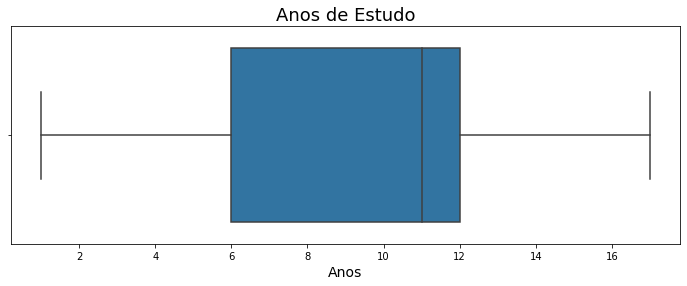

In [84]:
# Lembrando que 17 anos não é um valor de fato, é para casos que n seja identificados, mas vamos dizer
# para fins do exemplo que seja.
ax45 = sns.boxplot( x = "Anos de Estudo", data = dados,             
                   orient = "h")                   
ax45.figure.set_size_inches(12,4)
ax45.set_title("Anos de Estudo", fontsize = 18)
ax45.set_xlabel("Anos", fontsize = 14)
ax45

Vendo é fácil de visualizar que tem uma Assimetria para a esquerda, e uma concentração grande de pessoas com 11 a 12 anos de estudo.

Existe alguma diferença para ambos os sexos? Vamos ver.

## Exemplo 6: Anos de Estudo ambos os Sexos

<AxesSubplot:title={'center':'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

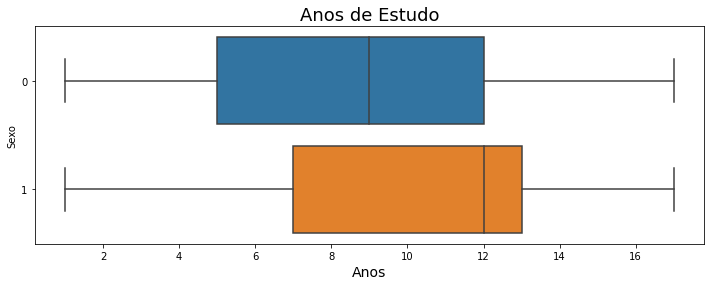

In [85]:
ax45 = sns.boxplot( x = "Anos de Estudo", y = "Sexo", data = dados,             
                   orient = "h")                   
ax45.figure.set_size_inches(12,4)
ax45.set_title("Anos de Estudo", fontsize = 18)
ax45.set_xlabel("Anos", fontsize = 14)
ax45

Mulheres tem, em geral, uma maior quantidade de anos de estudo que homens, podendo ver claramente que 75% dos homens tem a mesma quantidade de anos de estudo que 50% das mulheres, e os outros 50% tem mais anos de estudo ainda.

Temos aqui uma figura para ajudar a relacionar com as figuras entre relações de medidas separatrizes! Associando a mediana e os outros dois quartis com as possíveis simetrias. Facilitando entender como é o comportamento.

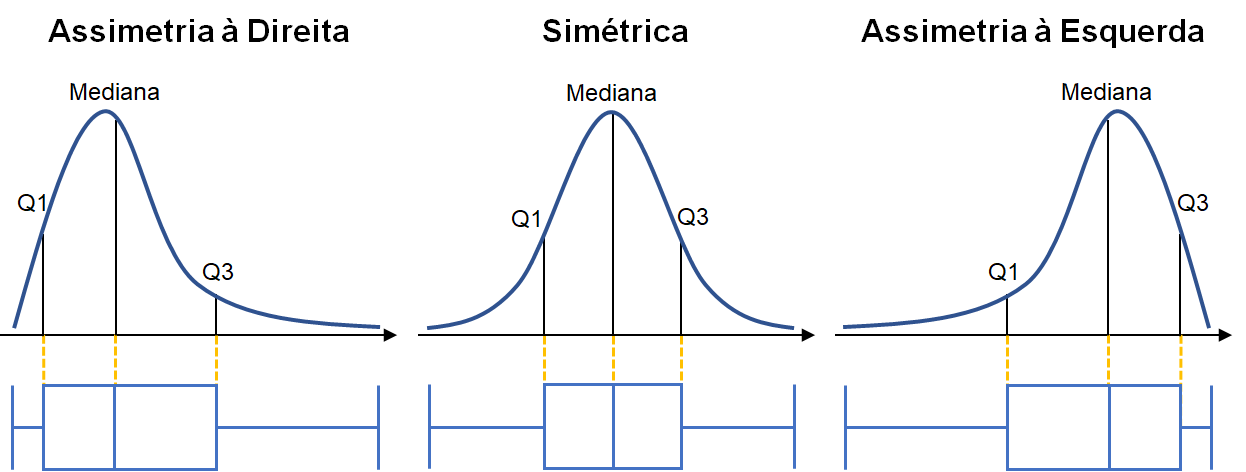

## Exemplo 7: Exercício de Estados por Renda

<AxesSubplot:title={'center':'Renda (R$) - Bahia X São Paulo'}, xlabel='R$', ylabel='UF'>

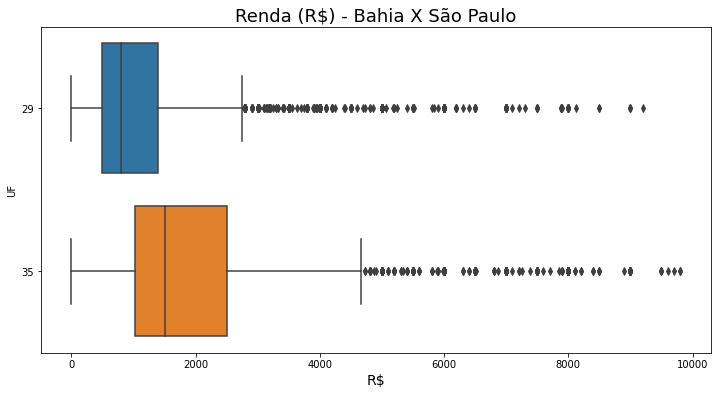

In [86]:
ax46 = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('(UF==35 or UF==29) and Renda < 10000'), orient = 'h')

ax46.figure.set_size_inches(12, 6)
ax46.set_title('Renda (R$) - Bahia X São Paulo', fontsize=18)
ax46.set_xlabel('R$', fontsize=14)
ax46

# Aula5: Medidas de dispersão

Aula focada naquilo que sobrou!
## Desvio médio absoluto

In [87]:
# Voltando à relação entre nota média de 3 alunos
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [88]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

Fulano e Sicrano tem notas médias iguais, contudo comportamentos diferentes entre suas notas. Eles tbm têm a mesma mediana:

In [89]:
df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

Mas podemos agora ver o desvio médio absoluto através de uma dada expressão matemática:
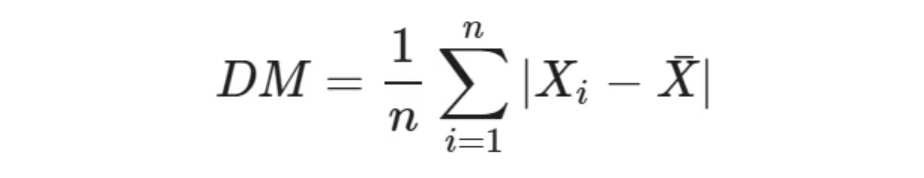

Que é basicamente a soma de todas as diferenças entre cada elemento e o valor médio.

Vamos fazer para cada um dos casos.

In [90]:
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [91]:
# para encontrar a média:
nota_media_fulano = notas_fulano["Fulano"].mean()
nota_media_fulano

7.714285714285714

In [92]:
#Criaremos agora a coluna desvio dentro do dataframe de fulano:
notas_fulano["Desvio"] = notas_fulano["Fulano"] - nota_media_fulano
notas_fulano

,index,Fulano,Desvio
0,Inglês,4,-3.714286
1,História,6,-1.714286
2,Matemática,8,0.285714
3,Geografia,8,0.285714
4,Química,8,0.285714
5,Português,10,2.285714
6,Física,10,2.285714


E agora vemos na coluna 'Desvio' como cada uma das diferenças entre as notas para a nota média, tendo valores positivos e negativos.

In [93]:
# teremos que fazer um caso com a soma com só valores positivos!
# Caso tentemos fazer a soma agora, gerará um valor negativo.
# Por isso depois precisamos fazer o calculo com o absoluto do valor.
notas_fulano['Desvio'].sum()

-8.881784197001252e-16

In [94]:
# Esse valor é muito próximo de zero.
# Vamos agora fazer para o absoluto.
# Pode ser assim, ou pode ser .abs()
notas_fulano['|Desvio|'] = abs(notas_fulano['Desvio'])
notas_fulano

,index,Fulano,Desvio,|Desvio|
0,Inglês,4,-3.714286,3.714286
1,História,6,-1.714286,1.714286
2,Matemática,8,0.285714,0.285714
3,Geografia,8,0.285714,0.285714
4,Química,8,0.285714,0.285714
5,Português,10,2.285714,2.285714
6,Física,10,2.285714,2.285714


<AxesSubplot:>

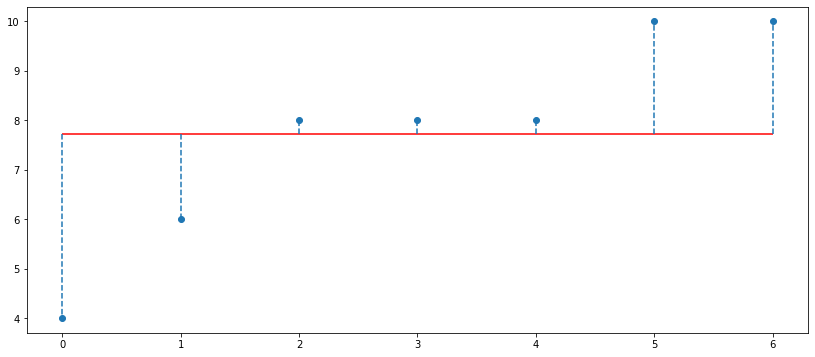

In [95]:
# Agr vem um representação gráfica do que ele quer fazer:
# Mostrando a média pela linha vermelha, e pegando os pontos pela
# linha tracejada.
ax5 = notas_fulano['Fulano'].plot(style = 'o')
ax5.figure.set_size_inches(14, 6)
ax5.hlines(y = nota_media_fulano, xmin = 0, xmax = notas_fulano.shape[0] - 1, colors = 'red')
for i in range(notas_fulano.shape[0]):
    ax5.vlines(x = i, ymin = nota_media_fulano, ymax = notas_fulano['Fulano'][i], linestyle='dashed')
ax5

Trabalhar com desvio médio padrão  implica em pegar todos os pontos negativos, jogar eles lá para o lado de cima, e definir uma média do desvio de cada um dos pontos.

In [96]:
notas_fulano['|Desvio|'].mean()

1.5510204081632655

In [97]:
# Outra forma de fazer isso, mais simples, resumindo tudo que a gente fez:
notas_fulano["Fulano"].mad()

1.5510204081632655

In [98]:
# Dá no mesmo resultado como esperado. Fazendo agora dos outros alunos:
df.Sicrano.mad()

0.4693877551020408

In [99]:
df.Beltrano.mad()

4.020408163265306

Isso depois pode ser pensado para o caso do data frame de dados, como é o desvio médio absoluto do pessoal que ganha renda?



## Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados. Ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado(evita número negativo). Portanto, calcularemos a soma do quadrado dos desvios dividido pelo número total.

Existe diferença do cálculo para dados populacionais e amostrais. No caso de estatística, geralmente trabalharemos com amostrais.

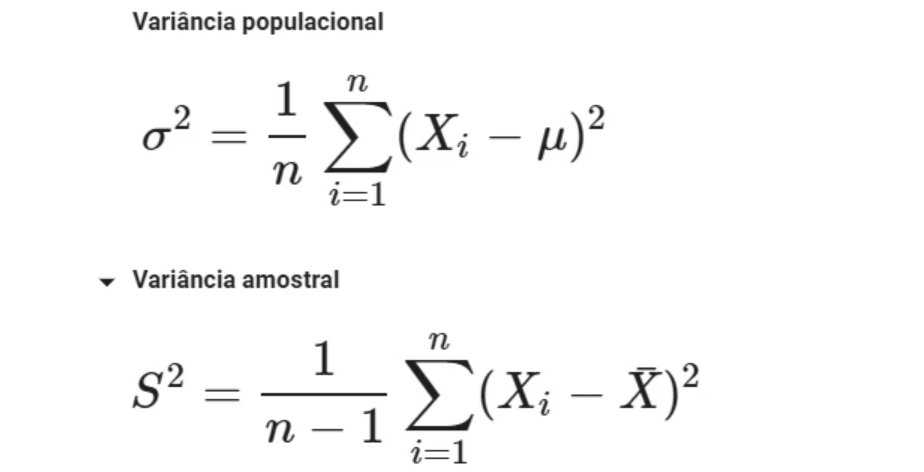

O primeiro _sigma_ ao quadrado, sendo igual ao somatório dos desvios em relação à média populacional representado por _mi_ e dividido por 'n'.

Já no segundo, dividiremos por "**n - 1**" conhecido como **Fator de correção de Bessel**, que teremos uma estimativa mais precisa do que o parâmetro populacional.

In [100]:
notas_fulano["(Desvio)^2"] = notas_fulano["Desvio"].pow(2)
notas_fulano

,index,Fulano,Desvio,|Desvio|,(Desvio)^2
0,Inglês,4,-3.714286,3.714286,13.795918
1,História,6,-1.714286,1.714286,2.938776
2,Matemática,8,0.285714,0.285714,0.081633
3,Geografia,8,0.285714,0.285714,0.081633
4,Química,8,0.285714,0.285714,0.081633
5,Português,10,2.285714,2.285714,5.224490
6,Física,10,2.285714,2.285714,5.224490


In [101]:
notas_fulano["(Desvio)^2"].sum() / (len(notas_fulano) -1)

4.57142857142857

In [102]:
# forma mais simples utilizando pandas
variancia_amostral = notas_fulano['Fulano'].var()
variancia_amostral

4.57142857142857

## Desvio padrão
Medida de dispersão mais conhecida, a ponto de eu trocar com o desvio médio absoluto.

Suas fórmulas são idênticas ao da variância, com o acrescento de uma raiz.
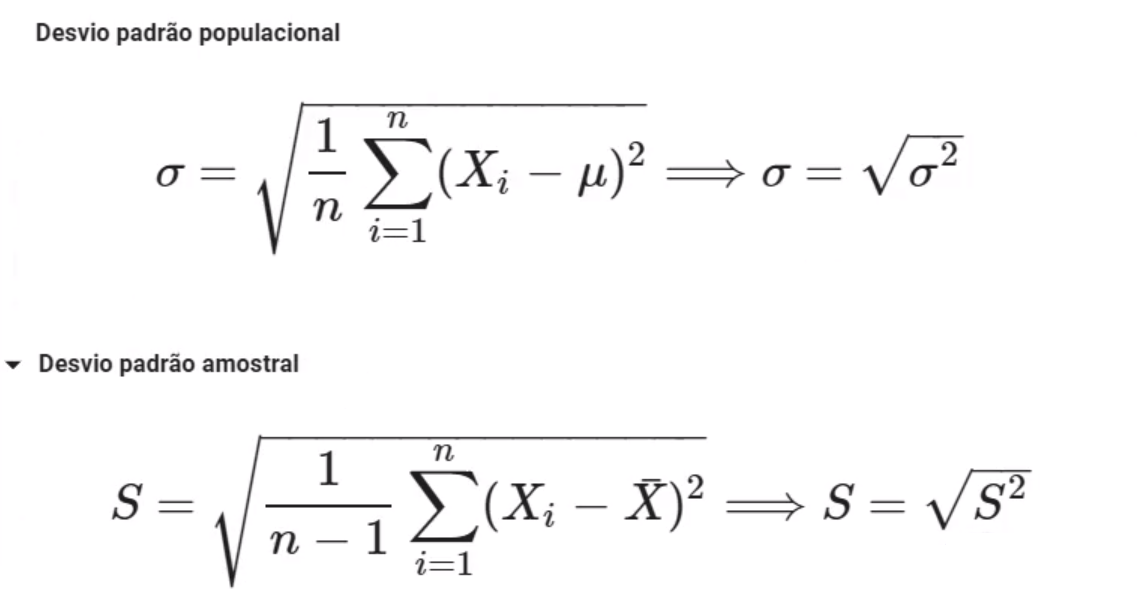

In [103]:
# basta fazer a raiz quadrada  da variância!
np.sqrt(variancia_amostral)

2.1380899352993947

In [104]:
# Outra forma de fazer isso, a sua função padrão:
desvio_padrao = notas_fulano["Fulano"].std()
desvio_padrao

2.1380899352993947

In [105]:
# lembrando df
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [106]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [107]:
df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [108]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [109]:
df.std()

Matérias
Fulano      2.138090
Beltrano    4.460141
Sicrano     0.566947
dtype: float64

Mostra que apesar de fulano e sicrano teram a mesma média, mediana e moda, parecendo ser o mesmo aluno, o desvio padrão mostra que sicrano tem pouco desvio, logo ele é mais constante nas notas, enquanto fulano tem um desvio maior e tira notas mais extremas.

In [110]:
# Lembrando de dataset
dataset

,Sexo,Idade
0,H,53
1,M,72
2,M,54
3,M,27
4,M,30
5,H,40
6,H,58
7,H,32
8,M,44
9,M,51


In [111]:
dataset["Idade"].std()

14.184890239656813

In [112]:
dataset.groupby("Sexo").std()

,Idade
Sexo,
H,11.898879
M,16.645320


In [113]:
# Ou podemos ser mais precisos:
dataset.groupby(['Sexo']).std().loc['M']

Idade    16.64532
Name: M, dtype: float64

# Aula6: Projeto Final